In [42]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import time as t
import random
from scipy.stats import iqr

In [43]:
environmental_indicators = [
    "Air Quality Index (AQI)",
    "Carbon Dioxide (CO2) Emissions",
    "Methane (CH4) Emissions",
    "Nitrous Oxide (N2O) Emissions",
    "Particulate Matter (PM2.5 and PM10)",
    "Ozone (O3) Concentration",
    "Water Quality Index (WQI)",
    "Biodiversity Index",
    "Deforestation Rate",
    "Soil Erosion Rate",
    "Waste Generation Rate",
    "Recycling Rate",
    "Energy Consumption",
    "Renewable Energy Usage",
    "Water Consumption",
    "Land Use Change"
]
mean_std_list = [(random.uniform(-100, 100), random.uniform(0.1, 50))
                 for _ in range(16)]

# 🎲 Generate a Random Matrix:

In [44]:
import numpy as np


def generate_matrix(rows: int, columns: int, distributions: list[tuple[float, float]] = None, global_mean_std: tuple[float, float] = None) -> np.ndarray:
    """
    Generates a matrix where each column follows a specified normal distribution.
    
    Parameters:
    rows (int): Number of rows in the matrix.
    columns (int): Number of columns in the matrix.
    distributions (list of tuples, optional): A list where each tuple contains (mean, std) for the normal distribution
                                              of the corresponding column. The length must match the number of columns.
    global_mean_std (tuple, optional): A single (mean, std) pair to be applied to all columns if distributions are not provided.
    
    Returns:
    np.ndarray: Generated matrix with specified distributions.
    """
    if global_mean_std:
        mean, std = global_mean_std
        return np.random.normal(loc=mean, scale=std, size=(rows, columns))

    if distributions is None or len(distributions) != columns:
        raise ValueError(
            "Number of distributions must match the number of columns or provide a global mean and std.")

    matrix = np.zeros((rows, columns))
    for col in range(columns):
        mean, std = distributions[col]
        matrix[:, col] = np.random.normal(loc=mean, scale=std, size=rows)

    return matrix


### 📌 Example:

In [45]:
# Example usage:
rows = 5
columns = 3
# Mean and std deviation for each column
specific_distributions = [(0, 1), (5, 2), (-3, 0.5)]
global_distribution = (2, 1)  # Apply same mean and std to all columns

# Using specific distributions

matrix1 = generate_matrix(rows, columns, distributions=specific_distributions)
print("Matrix with specific distributions:\n", matrix1)

# Using global mean and std
matrix2 = generate_matrix(rows, columns, global_mean_std=global_distribution)
print("\nMatrix with global distribution:\n", matrix2)

Matrix with specific distributions:
 [[-0.57334744  3.35868943 -2.4451331 ]
 [-1.52311296  4.85429804 -3.06646321]
 [-0.03901362  6.2873801  -2.41607687]
 [-1.15468391  3.22649191 -3.47037202]
 [ 0.63138753  4.86031832 -2.39668153]]

Matrix with global distribution:
 [[1.82594342 0.79381042 1.08290962]
 [3.22569711 1.98248666 1.37504251]
 [1.39228786 1.89283832 1.64407379]
 [2.95276188 2.09761832 2.26465265]
 [4.77586622 2.94079995 0.59417457]]


# 🎲 Function to Generate Multiple Matrices with Customizable Storage and Distribution Options


In [46]:
from typing import List, Tuple, Dict, Union


def generate_matrices(num_matrices: int, rows: int, columns: int, storage_type: str = "array",
                      distributions: List[Tuple[float, float]] = None, global_mean_std: Tuple[float, float] = None) -> Union[List[np.ndarray], Dict[str, np.ndarray]]:
    """
    Generates multiple matrices and stores them in either a list (array) or a dictionary.
    
    Parameters:
    num_matrices (int): Number of matrices to generate.
    rows (int): Number of rows per matrix.
    columns (int): Number of columns per matrix.
    storage_type (str): Either "array" for a list or "dict" for a dictionary.
    distributions (List[Tuple[float, float]], optional): List of (mean, std) pairs for each column.
    global_mean_std (Tuple[float, float], optional): Single (mean, std) pair for all columns.
    
    Returns:
    Union[List[np.ndarray], Dict[str, np.ndarray]]: Generated matrices stored as a list or dictionary.
    """
    if storage_type not in ["array", "dict"]:
        raise ValueError("storage_type must be either 'array' or 'dict'")

    if storage_type == "array":
        return [generate_matrix(rows, columns, distributions, global_mean_std) for _ in range(num_matrices)]
    else:
        return {f"matrix_{i}": generate_matrix(rows, columns, distributions, global_mean_std) for i in range(num_matrices)}
    
    

### 📌 Example:

In [47]:
# Example usage:
num_matrices = 3
rows = 5
columns = 3
# Mean and std deviation for each column
specific_distributions = [(0, 1), (5, 2), (-3, 0.5)]
global_distribution = (2, 1)  # Apply same mean and std to all columns

# Generate list of matrices
matrix_list = generate_matrices(
    num_matrices, rows, columns, "array", specific_distributions)
print("List of Matrices:", matrix_list)

# Generate dictionary of matrices
matrix_dict = generate_matrices(
    num_matrices, rows, columns, "dict", global_mean_std=global_distribution)
print("\nDictionary of Matrices:", matrix_dict)

List of Matrices: [array([[ 0.00995476,  4.79784418, -3.23572479],
       [ 0.55980764,  2.20351532, -2.81471179],
       [-1.76649093,  4.14920403, -3.17717898],
       [ 0.6600425 ,  3.61599654, -3.52208876],
       [ 1.93693038,  0.62839798, -3.05146   ]]), array([[-1.36367733,  6.14559167, -2.29067018],
       [-0.96042721,  3.42936649, -2.9040448 ],
       [ 1.14630252,  1.39149237, -2.54739253],
       [ 0.42051941,  3.24721435, -2.97001868],
       [-0.21361292,  5.29998821, -3.74483521]]), array([[-0.43882307,  4.73812887, -3.80960568],
       [ 0.12644723,  4.38836705, -2.65045165],
       [-0.32761131,  4.84345015, -3.25491028],
       [-1.16350646,  5.83581693, -2.99682306],
       [ 0.090634  ,  4.52958741, -3.00257075]])]

Dictionary of Matrices: {'matrix_0': array([[ 0.36613763,  2.97479205,  2.34352679],
       [ 4.27801118,  3.11695797,  4.29053595],
       [ 2.99146671,  2.77813303,  2.45971788],
       [ 3.00871863,  1.33985554,  2.50911922],
       [ 1.28585237, -0.1

In [ ]:
A = generate_matrix(10,10,global_mean_std=(3,2))
B = generate_matrix(10, 10, global_mean_std=(6, 0.9))
C = generate_matrix(10, 10, global_mean_std=(3, 0.9))
D = generate_matrix(10, 10, global_mean_std=(3, 0.9))

FACTORS = ["Water Usage",
           "Carbon Emissions",
           "Energy Consumption",
           "Material Waste",
           "Land Use",
           "Air Pollution",
           "Toxicity",
           "Resource depletion",
           "Eutrophication",
           "Acidification"]


# Robust testing
'''
Big_A = generate_matrix(10000, 10000, global_mean_std=(3, 0.9))
Big_B = generate_matrix(10000, 10000, global_mean_std=(3, 0.9))'
'''

"\nBig_A = generate_matrix(10000, 10000, global_mean_std=(3, 0.9))\nBig_B = generate_matrix(10000, 10000, global_mean_std=(3, 0.9))'\n"

In [83]:
A

array([[4.27548726, 2.49833568, 1.13426555, 1.58401285, 2.32378188,
        4.13808102, 2.45891001, 2.31885259, 4.4411996 , 3.53473166],
       [3.76318419, 3.71804198, 2.72432402, 3.11408853, 4.38719451,
        3.98890058, 1.45464299, 2.85454073, 2.97030068, 2.06959376],
       [2.2318373 , 3.20621403, 2.80481688, 3.68657192, 2.33293481,
        4.22594376, 4.21252491, 4.5142622 , 2.25163991, 3.69279199],
       [3.85012002, 3.12372336, 3.01489832, 2.69487331, 3.54802576,
        3.38824998, 2.15118687, 2.98007361, 3.78990959, 3.50634764],
       [4.66210591, 3.98440078, 4.15258078, 3.50755581, 2.86290145,
        3.62406357, 2.85749521, 3.53902338, 2.80288968, 2.34406571],
       [3.2308192 , 3.30460837, 4.95153714, 1.91507064, 2.73385056,
        3.08560252, 4.33993238, 2.79603954, 2.65730441, 3.11482295],
       [2.40735515, 3.50554158, 1.49198817, 1.10877182, 2.23323794,
        4.87027535, 3.69038521, 2.28803512, 3.4791352 , 3.54684484],
       [3.26904465, 2.51508306, 4.1041904

## 🧮 Discernibility Analysis:

### 🧩 Simple code:

In [49]:
def DA_prim(A,B):
    N= len(A)
    if A.shape != B.shape or len(A)==0:
        raise ValueError("A and B should have the same dimensions & Matrices shouldn't be empty.")
    result=np.zeros(N)

    for j in range(N):
         counter=0
         for i in range(N):
             if A[i,j]-B[i,j]<0:
                 counter+=1
         result[j]=counter/N

    return result
                 
      

### 🏁 High level & Efficient code:

In [87]:
def Discernibility_Analysis(mat1: np.ndarray, mat2: np.ndarray) -> np.ndarray:


    if mat1.shape[1] != mat2.shape[1]:
         raise ValueError("Both matrices must have the same number of columns")
    
    return np.mean(mat1-mat2<0, axis=0)

### ✅ Test

In [86]:
DA_prim(A, B)

ValueError: A and B should have the same dimensions & Matrices shouldn't be empty.

In [52]:
Discernibility_Analysis(A,B)

array([0.2, 0.1, 0.4, 0.5, 0.7, 0.1, 0.5, 0.4, 0.5, 0.3])

In [53]:
start_time = t.time()
DA_prim(Big_A,Big_B)
end_time = t.time()

print(f"Execution time of DA_prim : {end_time - start_time} seconds\n")

start_time = t.time()
Discernibility_Analysis(Big_A,Big_B)
end_time = t.time()

print(
    f"Execution time of Discernibility_Analysis : {end_time - start_time} seconds\n")

NameError: name 'Big_A' is not defined

## 📊 Vizualisation of the Discernability Analysis

### Heatmap Color Palettes 🎨

Seaborn provides a variety of color palettes for heatmaps. Here are some popular ones and their use cases:

| Palette Name | Description | Example Use Case | Emoji Representation |
|--------------|-------------|------------------|----------------------|
| `"YlGnBu"`   | Yellow-Green-Blue gradient 🌈 | Default for discernibility analysis | 🟨🟩🟦 |
| `"viridis"`  | Perceptually uniform gradient 🌟 | Scientific data visualization | 🟣🔵🟢 |
| `"coolwarm"` | Blue-Red gradient 🔵🔴 | Highlighting contrasts in data | 🔵🔴 |
| `"RdYlBu"`   | Red-Yellow-Blue gradient 🌈 | Emphasizing diverging data | 🔴🟨🔵 |
| `"Greens"`   | Green gradient 🌿 | Environmental or sustainability data | 🟢 |
| `"Blues"`    | Blue gradient 💙 | Water-related or calm data | 🔵 |
| `"Reds"`     | Red gradient 🔥 | Highlighting risks or warnings | 🔴 |

Choose a palette that aligns with your data's context and the message you want to convey! 🎨✨

### 🔧 Functional Code:

In [ ]:


def plot_discernibility_heatmap(matrices: List[np.ndarray], labels: List[str], factor_names: List[str], heatmap_theme: str = "YlGnBu"):
    """
    Plots a heatmap of discernibility analysis for multiple alternatives and factors.
    
    Parameters:
    matrices (List[np.ndarray]): List of matrices for each alternative (shape: n_samples x n_factors).
    labels (List[str]): List of labels for each alternative.
    factor_names (List[str]): List of names for each factor (e.g., water, carbon, material).
    heatmap_theme (str): Color palette for the heatmap. Default is "YlGnBu".
    """
    n_alternatives = len(matrices)
    n_factors = matrices[0].shape[1]

    # Initialize a matrix to store discernibility probabilities
    heatmap_data = np.zeros(
        (n_alternatives * (n_alternatives - 1) // 2, n_factors))

    # Fill the heatmap data
    row_labels = []
    idx = 0

    for i in range(n_alternatives):
        for j in range(i + 1, n_alternatives):
            row_labels.append(f"{labels[i]} > {labels[j]}")
            heatmap_data[idx, :] = Discernibility_Analysis(
                matrices[i], matrices[j])
            idx += 1

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".2f",
        cmap=heatmap_theme,  # Use the specified color palette
        xticklabels=factor_names,
        yticklabels=row_labels
    )
    plt.xlabel("Factors")
    plt.ylabel("Alternative Comparisons")
    plt.title("Discernibility Analysis Heatmap")
    plt.show()

### ✅ Test

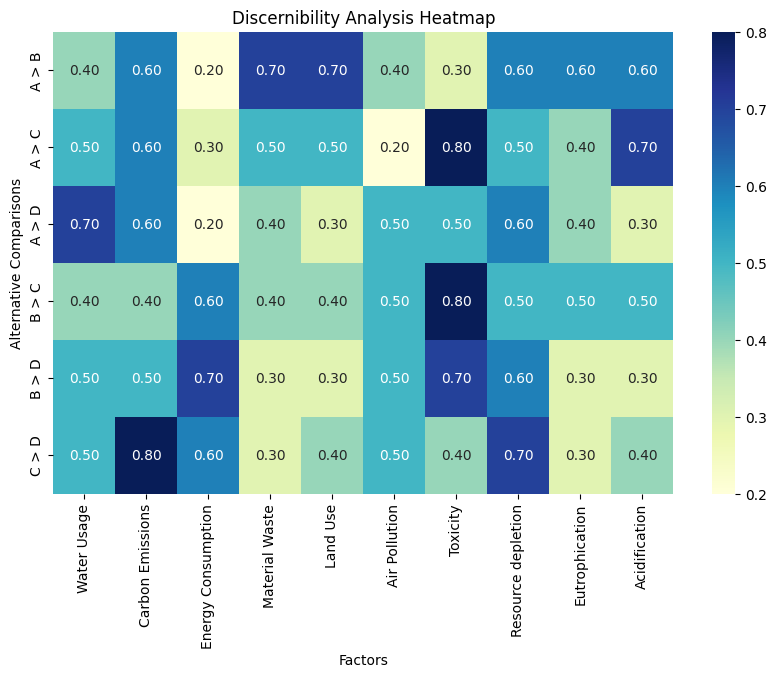

In [ ]:
plot_discernibility_heatmap(matrices=[A,B,C,D],
                            labels=["A","B","C","D"],
                            factor_names=FACTORS)

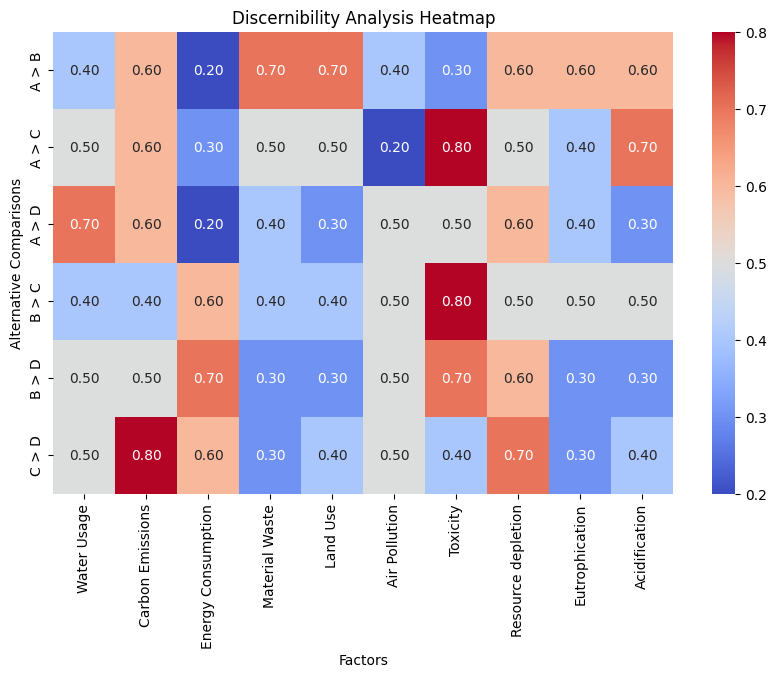

In [ ]:
plot_discernibility_heatmap(matrices=[A, B, C, D],
                            labels=["A", "B", "C", "D"],
                            factor_names=FACTORS,heatmap_theme="coolwarm")

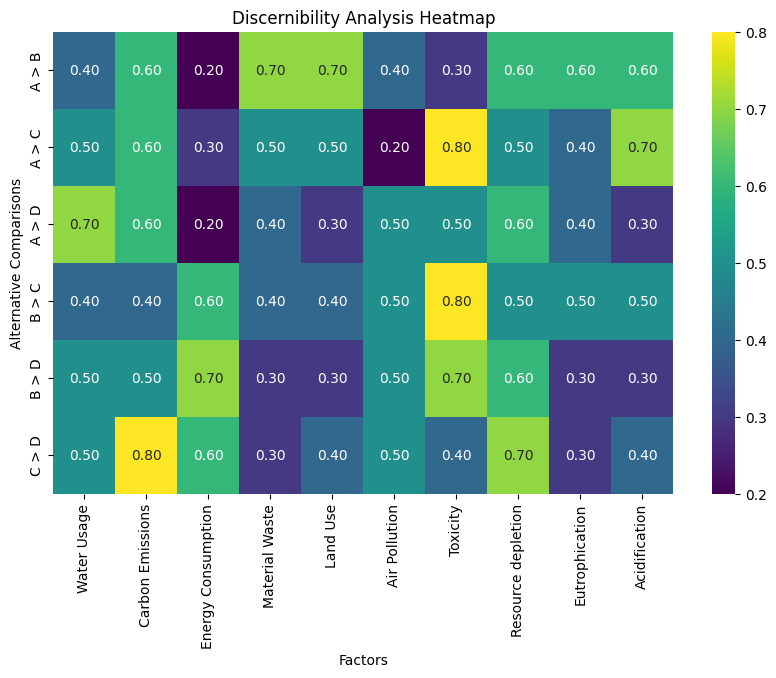

In [ ]:
plot_discernibility_heatmap(matrices=[A, B, C, D],
                            labels=["A", "B", "C", "D"],
                            factor_names=FACTORS,heatmap_theme="viridis")

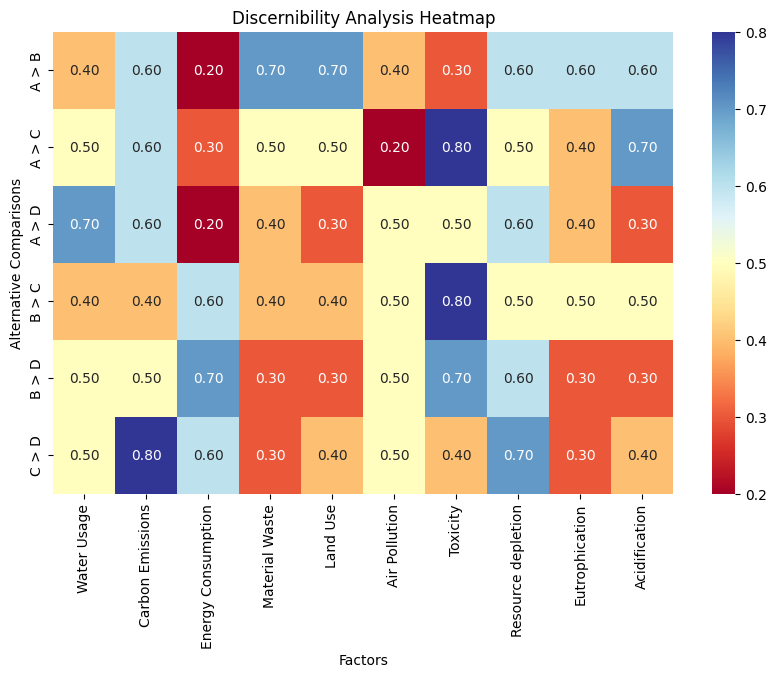

In [ ]:
plot_discernibility_heatmap(matrices=[A, B, C, D],
                            labels=["A", "B", "C", "D"],
                            factor_names=FACTORS, heatmap_theme="RdYlBu")

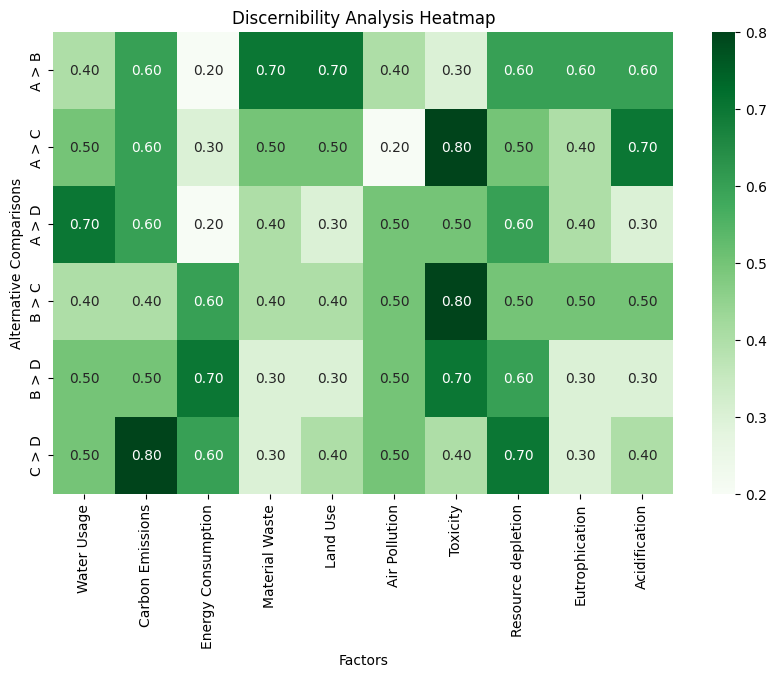

In [ ]:
plot_discernibility_heatmap(matrices=[A, B, C, D],
                            labels=["A", "B", "C", "D"],
                            factor_names=FACTORS, heatmap_theme="Greens")

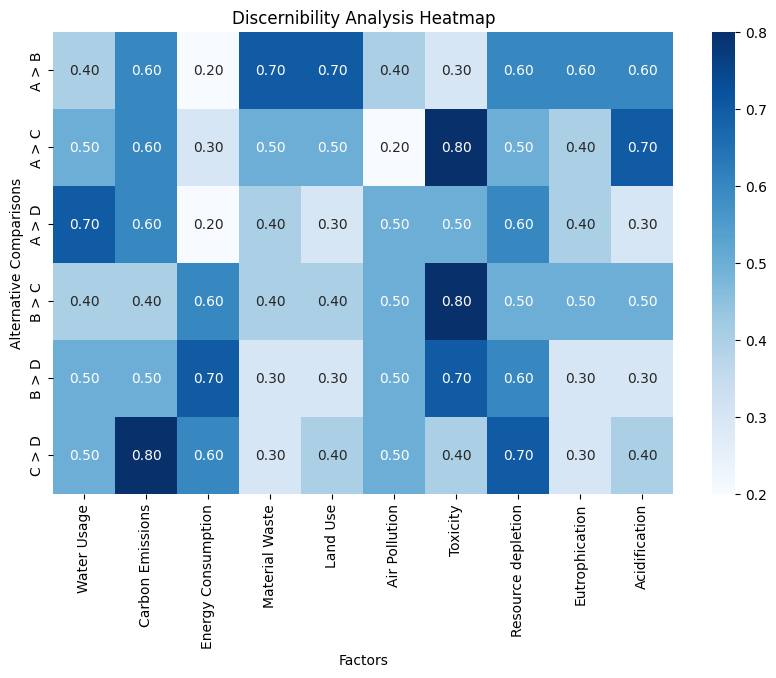

In [ ]:
plot_discernibility_heatmap(matrices=[A, B, C, D],
                            labels=["A", "B", "C", "D"],
                            factor_names=FACTORS, heatmap_theme="Blues")

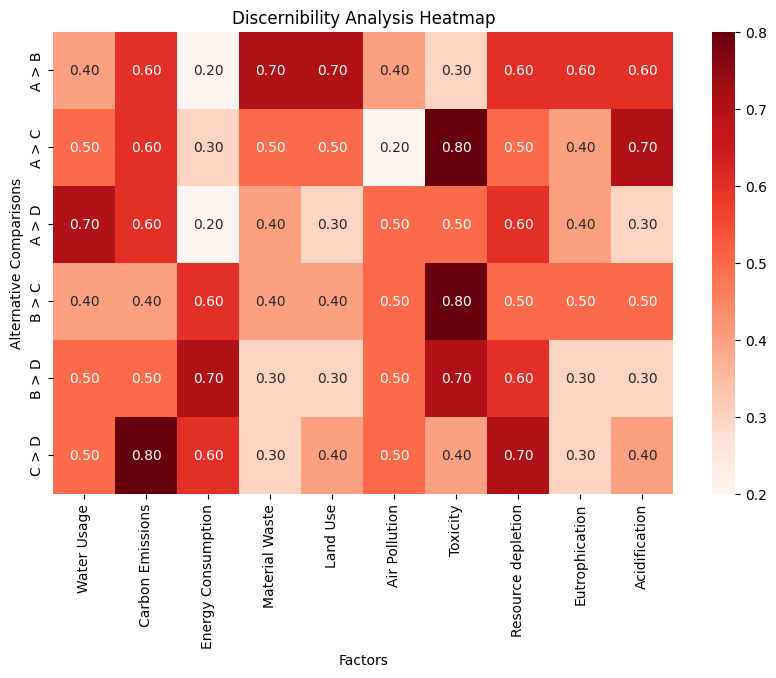

In [ ]:
plot_discernibility_heatmap(matrices=[A, B, C, D],
                            labels=["A", "B", "C", "D"],
                            factor_names=FACTORS, heatmap_theme="Reds")

## 🎯 Probability of Occurence of Rankings:

### ✅ Test

In [ ]:
# Example usage:
# Suppose we have two matrices for two different indicators
matrix1 = np.array([
    [10, 20, 30],  # Simulation 1: Alternative 1 has the lowest impact, followed by 2 and 3
    [20, 10, 30],  # Simulation 2: Alternative 2 has the lowest impact, followed by 1 and 3
    [30, 20, 10]   # Simulation 3: Alternative 3 has the lowest impact, followed by 2 and 1
])

matrix2 = np.array([
    [15, 25, 35],  # Simulation 1: Alternative 1 has the lowest impact, followed by 2 and 3
    [25, 15, 35],  # Simulation 2: Alternative 2 has the lowest impact, followed by 1 and 3
    [35, 25, 15]   # Simulation 3: Alternative 3 has the lowest impact, followed by 2 and 1
])

matrices = [matrix1, matrix2]

# Calculate the ranking probabilities
ranking_probabilities = calculate_ranking_probabilities(matrices)

# Print the results
for ranking, probability in ranking_probabilities.items():
    print(f"Ranking: {ranking}, Probability: {probability:.4f}")

Ranking: (np.int64(1), np.int64(2), np.int64(3)), Probability: 0.3333
Ranking: (np.int64(2), np.int64(1), np.int64(3)), Probability: 0.3333
Ranking: (np.int64(3), np.int64(2), np.int64(1)), Probability: 0.3333


Function: radar_chart_median_iqr
This function generates a radar chart to visualize the median and interquartile range (IQR) of multiple matrices. Each matrix is represented by a line (median) and a shaded region (IQR) on the radar chart

# 📱 **Radar Chart with Median and IQR**  

## **Function Overview**  
The `radar_chart_median_iqr` function creates a **radar chart** (also known as a spider chart) to visualize the **median** and **Interquartile Range (IQR)** of multiple matrices. This is useful for comparing different datasets across multiple factors.  

### **Function Parameters**  
| Parameter       | Type                | Description |
|---------------|-----------------|------------------|
| `matrices`    | `list of np.ndarray` | A list of matrices, where each matrix contains multiple samples and columns represent different factors. |
| `labels`      | `list` (optional)    | A list of labels for the factors (columns). If `None`, default labels (`Factor 1`, `Factor 2`, etc.) are used. |
| `matrix_names` | `list` (optional)    | Names for each matrix, used in the legend. If `None`, default names (`Matrix 1`, `Matrix 2`, etc.) are assigned. |
| `color_palette` | `list` (optional)   | A list of colors to differentiate matrices. If `None`, a default set of colors is used. |

---

## **How the Function Works**
1. Determines the number of **variables (columns)** in the matrices.
2. If labels are **not provided**, assigns default labels (`Factor 1`, `Factor 2`, etc.).
3. If `matrix_names` are **not provided**, assigns default names (`Matrix 1`, `Matrix 2`, etc.).
4. Computes **angles** for plotting the radar chart.
5. Loops through each matrix:
   - Computes the **median** and **IQR (Q1 and Q3)** for each column.
   - Plots the **median values** as a solid line.
   - Shades the **IQR region** (between Q1 and Q3).
6. Displays the radar chart with **labels, a title, and a legend**.

---

## **How to Control the Color Palette**
The `color_palette` parameter allows you to specify custom colors for each matrix. If **not provided**, the function defaults to:  
`['blue', 'green', 'red', 'purple', 'orange']`.  

### **Example Color Palette Options**
| Color List | Colors Used |
|------------|------------|
| `['blue', 'red', 'yellow']` | The first matrix is blue, the second is red, the third is yellow. |
| `['#FF5733', '#33FF57', '#3357FF']` | Uses **hex codes** for custom colors. |
| `plt.cm.viridis.colors[:5]` | Uses the first five colors from the **Viridis** colormap in Matplotlib. |

### **Example Usage**
```python
color_palette = ['#FF5733', '#33FF57', '#3357FF', '#F39C12', '#9B59B6']
radar_chart_median_iqr(matrices, labels=labels, matrix_names=matrix_names, color_palette=color_palette)
```

---

This function is useful for **comparing multiple datasets** on a single radar chart, making it easier to visualize trends and distributions across different factors. 🚀

In [90]:



def radar_chart_median_iqr(matrices, labels=None, matrix_names=None, color_palette=None):
    """
    Creates a radar chart that visualizes the median and IQR of multiple matrices.

    Parameters:
        matrices (list of np.ndarray): List of matrices to visualize.
        labels (list): Labels for the factors (columns). If None, default labels are used.
        matrix_names (list): Names for each matrix (for the legend). If None, default names are used.
        color_palette (list): List of colors to use for each matrix. If None, a default palette is used.

    Returns:
        None (displays the radar chart).
    """
    # Number of variables (columns)
    num_vars = matrices[0].shape[1]

    # Create labels if not provided
    if labels is None:
        labels = [f'Factor {i+1}' for i in range(num_vars)]

    # Create matrix names if not provided
    if matrix_names is None:
        matrix_names = [f'Matrix {i+1}' for i in range(len(matrices))]

    # Use default color palette if not provided
    if color_palette is None:
        color_palette = ['blue', 'green', 'red', 'purple', 'orange']

    # Compute angles for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Close the loop for the radar chart
    angles += angles[:1]

    # Plot the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot each matrix
    for idx, matrix in enumerate(matrices):
        # Calculate median and IQR for the matrix
        median_values = np.median(matrix, axis=0)
        q1 = np.percentile(matrix, 25, axis=0)  # 25th percentile (Q1)
        q3 = np.percentile(matrix, 75, axis=0)  # 75th percentile (Q3)

        # Close the loop for the radar chart
        median_values = np.concatenate((median_values, [median_values[0]]))
        q1 = np.concatenate((q1, [q1[0]]))
        q3 = np.concatenate((q3, [q3[0]]))

        # Plot the median values
        ax.plot(angles, median_values, color=color_palette[idx % len(color_palette)],
                linewidth=2, label=matrix_names[idx])

        # Plot the IQR (shaded region between Q1 and Q3)
        ax.fill_between(
            angles, q1, q3, color=color_palette[idx % len(color_palette)], alpha=0.2)

    # Add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Add a title
    plt.title('Radar Chart with Median and IQR', size=16, y=1.1)

    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # Show the chart
    plt.show()

## *Generate two matrices*

In [88]:

matrices = [generate_matrix(100, 16, distributions=mean_std_list)for i in range(3)]
matrices

[array([[ 4.98429171e+01,  1.10449872e+01,  2.70633648e+01, ...,
          6.70715257e+01,  3.51114235e+01, -5.82429734e+01],
        [ 6.85013714e+01,  1.04539474e+01, -8.10229883e+00, ...,
          3.91712995e+01,  5.75105900e+01, -8.25539022e+01],
        [ 3.93715029e+01,  1.04427845e+01,  2.70845492e+01, ...,
          1.42203368e+01,  5.71612447e+01, -9.51174663e+01],
        ...,
        [ 1.32900017e+01,  1.04219158e+01, -3.03680607e+01, ...,
          1.86374915e+01,  5.61537126e+01, -8.14015329e-02],
        [ 6.67539102e+01,  1.01147942e+01, -1.69608075e+01, ...,
          4.83789974e+01,  1.20347610e+02, -8.68271247e+01],
        [ 3.50228771e+01,  7.84903152e+00,  4.15577645e+01, ...,
          4.41959042e+01,  1.45678970e+02, -1.06174522e+02]],
       shape=(100, 16)),
 array([[  34.25859214,    9.2754234 ,  -18.87874404, ...,   32.88166304,
          -76.4952698 , -104.23464696],
        [  20.48312376,    9.11902678,  -58.18834057, ...,   18.40046927,
          123.816

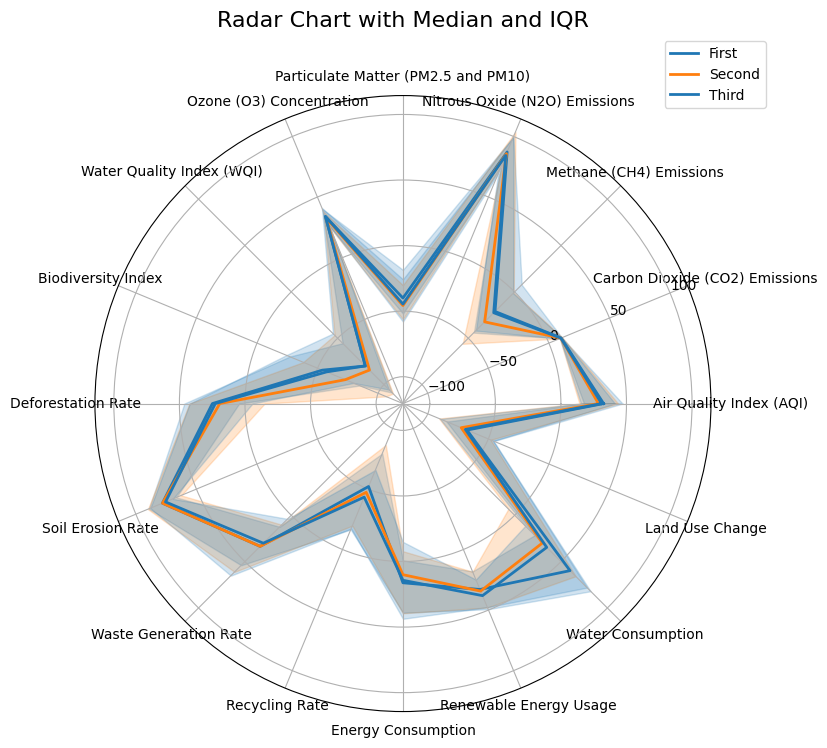

In [91]:
radar_chart_median_iqr(matrices=matrices, labels=environmental_indicators, matrix_names=["First","Second","Third"],color_palette=['#1f77b4', '#ff7f0e'])

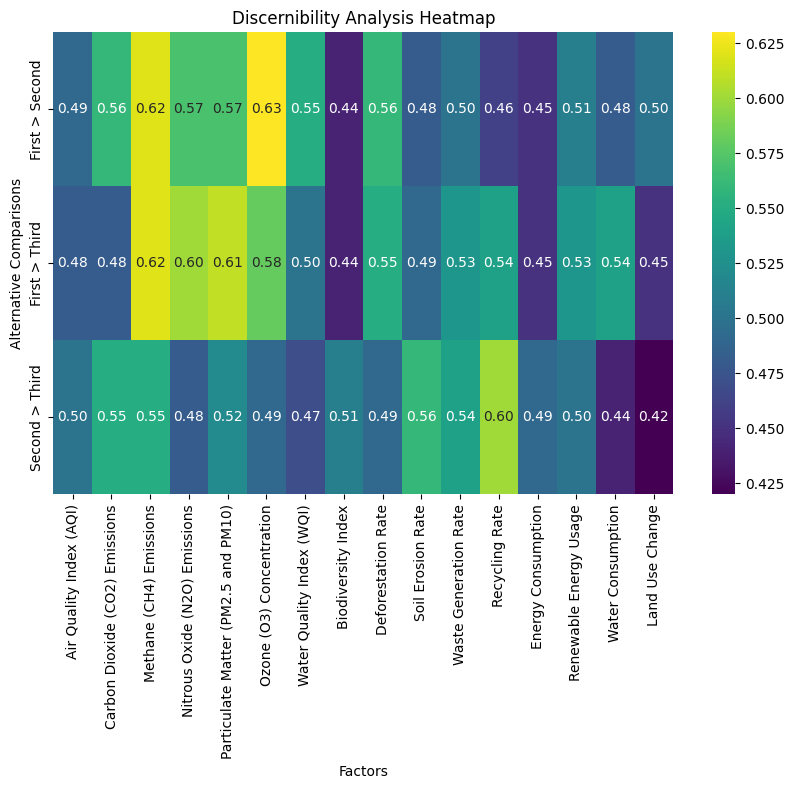

In [ ]:
plot_discernibility_heatmap(matrices=matrices,
                            labels=["First", "Second", "Third"],
                            factor_names=environmental_indicators,heatmap_theme="viridis")



# 📊 Ranking Probabilities Analysis Functions

## 🔍 Overview
In this section, we introduce several functions designed to analyze and visualize the ranking probabilities of different matrices. These functions help in understanding the relative performance of various alternatives across multiple factors.

## 🧩 Functions

### 1. `RP(matrices, factors)`
This function calculates the rankings for each factor across multiple matrices.

**Parameters:**
- `matrices`: List of matrices to analyze.
- `factors`: List of factor names.

**Returns:**
- A dictionary where each key is a factor and the value is a list of rankings for that factor.

### 2. `RP_with_probabilities(matrices, factors)`
This function calculates the ranking probabilities for each factor across multiple matrices.

**Parameters:**
- `matrices`: List of matrices to analyze.
- `factors`: List of factor names.

**Returns:**
- A dictionary where each key is a factor and the value is a dictionary of ranking probabilities.

### 3. `RP_with_probabilities_and_names(matrices, factors, matrix_names=None)`
This function calculates the ranking probabilities for each factor across multiple matrices and assigns names to the rankings.

**Parameters:**
- `matrices`: List or dictionary of matrices to analyze.
- `factors`: List of factor names.
- `matrix_names`: List of matrix names (optional).

**Returns:**
- A dictionary where each key is a factor and the value is a dictionary of ranking probabilities with named rankings.

### 4. `plot_ranking_probabilities_heatmap(probabilities, factors, heatmap_theme="viridis")`
This function plots a heatmap of ranking probabilities for each factor.

**Parameters:**
- `probabilities`: Ranking probabilities for each factor.
- `factors`: List of factor names.
- `heatmap_theme`: Color palette for the heatmap (default is "viridis").

**Returns:**
- Displays a heatmap of ranking probabilities.

In [54]:
def get_rankings(matrices):

    num_matrices = len(matrices)
    num_rows, num_cols = matrices[0].shape
    for matrix in matrices:
        if matrix.shape != (num_rows, num_cols):
            raise ValueError("All matrices must have the same dimensions.")

    rankings = []

    for row_idx in range(num_rows):


        row_rankings=[]

        for col_idx in range(num_cols):

            values = [matrix[row_idx, col_idx] for matrix in matrices]

            ranks = np.argsort(values)+1

            row_rankings.append(ranks)


        rankings.append(row_rankings)
    return rankings 



In [ ]:
get_rankings(matrices)

[[array([2, 3, 1]),
  array([1, 2, 3]),
  array([2, 3, 1]),
  array([2, 3, 1]),
  array([3, 1, 2]),
  array([1, 3, 2]),
  array([2, 3, 1]),
  array([3, 2, 1]),
  array([3, 1, 2]),
  array([3, 2, 1]),
  array([3, 2, 1]),
  array([3, 1, 2]),
  array([2, 3, 1]),
  array([1, 3, 2]),
  array([1, 2, 3]),
  array([3, 1, 2])],
 [array([3, 2, 1]),
  array([1, 2, 3]),
  array([2, 3, 1]),
  array([2, 3, 1]),
  array([1, 3, 2]),
  array([1, 3, 2]),
  array([3, 2, 1]),
  array([3, 1, 2]),
  array([3, 2, 1]),
  array([2, 1, 3]),
  array([1, 3, 2]),
  array([3, 2, 1]),
  array([3, 1, 2]),
  array([3, 2, 1]),
  array([2, 3, 1]),
  array([1, 3, 2])],
 [array([1, 2, 3]),
  array([3, 2, 1]),
  array([1, 3, 2]),
  array([2, 3, 1]),
  array([3, 1, 2]),
  array([1, 3, 2]),
  array([2, 1, 3]),
  array([2, 3, 1]),
  array([1, 2, 3]),
  array([2, 1, 3]),
  array([1, 3, 2]),
  array([2, 3, 1]),
  array([3, 1, 2]),
  array([3, 1, 2]),
  array([2, 3, 1]),
  array([1, 3, 2])],
 [array([1, 2, 3]),
  array([3, 2, 1]

## *Simple code*

In [56]:
def RP(matrices, factors=[
    "Air Quality Index (AQI)",
    "Carbon Dioxide (CO2) Emissions",
    "Methane (CH4) Emissions",
    "Nitrous Oxide (N2O) Emissions",
    "Particulate Matter (PM2.5 and PM10)",
    "Ozone (O3) Concentration",
    "Water Quality Index (WQI)",
    "Biodiversity Index",
    "Deforestation Rate",
    "Soil Erosion Rate",
    "Waste Generation Rate",
    "Recycling Rate",
    "Energy Consumption",
    "Renewable Energy Usage",
    "Water Consumption",
    "Land Use Change"
]):


    n,m = matrices[0].shape
    result={factor:[] for factor in factors}
    for j in range(m):
        for i in range(n):
            values = [matrix[i,j] for matrix in matrices]
            ranks = np.argsort(values)+1
            result[factors[j]].append(ranks)
    return result
            

In [57]:
RP(matrices)[environmental_indicators[8]]

[array([2, 1, 3]),
 array([3, 1, 2]),
 array([2, 1, 3]),
 array([1, 3, 2]),
 array([3, 2, 1]),
 array([2, 1, 3]),
 array([2, 1, 3]),
 array([3, 2, 1]),
 array([1, 2, 3]),
 array([1, 3, 2]),
 array([1, 2, 3]),
 array([2, 3, 1]),
 array([1, 2, 3]),
 array([2, 3, 1]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([2, 1, 3]),
 array([2, 1, 3]),
 array([1, 2, 3]),
 array([3, 2, 1]),
 array([1, 2, 3]),
 array([3, 1, 2]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([3, 1, 2]),
 array([1, 3, 2]),
 array([1, 2, 3]),
 array([1, 3, 2]),
 array([1, 2, 3]),
 array([3, 1, 2]),
 array([2, 1, 3]),
 array([3, 1, 2]),
 array([2, 1, 3]),
 array([1, 3, 2]),
 array([3, 1, 2]),
 array([2, 1, 3]),
 array([1, 3, 2]),
 array([3, 2, 1]),
 array([3, 1, 2]),
 array([3, 1, 2]),
 array([1, 3, 2]),
 array([3, 1, 2]),
 array([3, 2, 1]),
 array([2, 1, 3]),
 array([1, 2, 3]),
 array([3, 2, 1]),
 array([2, 1, 3]),
 array([3, 2, 1]),
 array([3, 1, 2]),
 array([3, 1, 2]),
 array([3, 1, 2]),
 array([1, 3

## **First function**  

In [59]:
def RP_with_probabilities(matrices, factors=[
    "Air Quality Index (AQI)",
    "Carbon Dioxide (CO2) Emissions",
    "Methane (CH4) Emissions",
    "Nitrous Oxide (N2O) Emissions",
    "Particulate Matter (PM2.5 and PM10)",
    "Ozone (O3) Concentration",
    "Water Quality Index (WQI)",
    "Biodiversity Index",
    "Deforestation Rate",
    "Soil Erosion Rate",
    "Waste Generation Rate",
    "Recycling Rate",
    "Energy Consumption",
    "Renewable Energy Usage",
    "Water Consumption",
    "Land Use Change"
]):
    n, m = matrices[0].shape
    result = {factor: [] for factor in factors}
    for j in range(m):
        for i in range(n):
            values = [matrix[i, j] for matrix in matrices]
            ranks = tuple(np.argsort(values) + 1)
            result[factors[j]].append(ranks)

    probabilities = {factor: {} for factor in factors}
    for factor, rankings in result.items():
        total_rankings = len(rankings)
        for ranking in rankings:
            if ranking not in probabilities[factor]:
                probabilities[factor][ranking] = 0
            probabilities[factor][ranking] += 1
        for ranking in probabilities[factor]:
            probabilities[factor][ranking] /= total_rankings

    return probabilities

In [60]:
RP_with_probabilities(matrices)

{'Air Quality Index (AQI)': {(np.int64(1), np.int64(2), np.int64(3)): 0.22,
  (np.int64(3), np.int64(2), np.int64(1)): 0.21,
  (np.int64(2), np.int64(1), np.int64(3)): 0.18,
  (np.int64(3), np.int64(1), np.int64(2)): 0.1,
  (np.int64(2), np.int64(3), np.int64(1)): 0.09,
  (np.int64(1), np.int64(3), np.int64(2)): 0.2},
 'Carbon Dioxide (CO2) Emissions': {(np.int64(2),
   np.int64(1),
   np.int64(3)): 0.16,
  (np.int64(1), np.int64(2), np.int64(3)): 0.17,
  (np.int64(3), np.int64(2), np.int64(1)): 0.16,
  (np.int64(1), np.int64(3), np.int64(2)): 0.26,
  (np.int64(3), np.int64(1), np.int64(2)): 0.1,
  (np.int64(2), np.int64(3), np.int64(1)): 0.15},
 'Methane (CH4) Emissions': {(np.int64(3), np.int64(1), np.int64(2)): 0.13,
  (np.int64(1), np.int64(2), np.int64(3)): 0.18,
  (np.int64(3), np.int64(2), np.int64(1)): 0.16,
  (np.int64(2), np.int64(3), np.int64(1)): 0.18,
  (np.int64(1), np.int64(3), np.int64(2)): 0.2,
  (np.int64(2), np.int64(1), np.int64(3)): 0.15},
 'Nitrous Oxide (N2O) Emi

## **Second Function**

In [61]:
def RP_with_probabilities_and_names(matrices, factors, matrix_names=None):
    """
    Calculate ranking probabilities for each factor across multiple matrices.

    Parameters:
    matrices (Union[List[np.ndarray], Dict[str, np.ndarray]]): List or dictionary of matrices.
    factors (List[str]): List of factor names.
    matrix_names (List[str], optional): List of matrix names. If None, default names are used.

    Returns:
    Dict[str, Dict[Tuple[int], float]]: Ranking probabilities for each factor.
    """
    if isinstance(matrices, dict):
        matrix_names = list(matrices.keys())
        matrices = list(matrices.values())
    elif matrix_names is None:
        matrix_names = [f"Matrix {i+1}" for i in range(len(matrices))]

    n, m = matrices[0].shape
    result = {factor: [] for factor in factors}
    for j in range(m):
        for i in range(n):
            values = [matrix[i, j] for matrix in matrices]
            ranks = tuple(np.argsort(values) + 1)
            result[factors[j]].append(ranks)

    probabilities = {factor: {} for factor in factors}
    for factor, rankings in result.items():
        total_rankings = len(rankings)
        for ranking in rankings:
            if ranking not in probabilities[factor]:
                probabilities[factor][ranking] = 0
            probabilities[factor][ranking] += 1
        for ranking in probabilities[factor]:
            probabilities[factor][ranking] /= total_rankings

    # Convert rank tuples to matrix names
    named_probabilities = {factor: {} for factor in factors}
    for factor, rank_dict in probabilities.items():
        for rank_tuple, prob in rank_dict.items():
            named_rank_tuple = tuple(matrix_names[rank - 1] for rank in rank_tuple)
            named_probabilities[factor][named_rank_tuple] = prob

    return named_probabilities

In [62]:
RP_with_probabilities_and_names(matrices, factors=environmental_indicators), environmental_indicators

({'Air Quality Index (AQI)': {('Matrix 1', 'Matrix 2', 'Matrix 3'): 0.22,
   ('Matrix 3', 'Matrix 2', 'Matrix 1'): 0.21,
   ('Matrix 2', 'Matrix 1', 'Matrix 3'): 0.18,
   ('Matrix 3', 'Matrix 1', 'Matrix 2'): 0.1,
   ('Matrix 2', 'Matrix 3', 'Matrix 1'): 0.09,
   ('Matrix 1', 'Matrix 3', 'Matrix 2'): 0.2},
  'Carbon Dioxide (CO2) Emissions': {('Matrix 2',
    'Matrix 1',
    'Matrix 3'): 0.16,
   ('Matrix 1', 'Matrix 2', 'Matrix 3'): 0.17,
   ('Matrix 3', 'Matrix 2', 'Matrix 1'): 0.16,
   ('Matrix 1', 'Matrix 3', 'Matrix 2'): 0.26,
   ('Matrix 3', 'Matrix 1', 'Matrix 2'): 0.1,
   ('Matrix 2', 'Matrix 3', 'Matrix 1'): 0.15},
  'Methane (CH4) Emissions': {('Matrix 3', 'Matrix 1', 'Matrix 2'): 0.13,
   ('Matrix 1', 'Matrix 2', 'Matrix 3'): 0.18,
   ('Matrix 3', 'Matrix 2', 'Matrix 1'): 0.16,
   ('Matrix 2', 'Matrix 3', 'Matrix 1'): 0.18,
   ('Matrix 1', 'Matrix 3', 'Matrix 2'): 0.2,
   ('Matrix 2', 'Matrix 1', 'Matrix 3'): 0.15},
  'Nitrous Oxide (N2O) Emissions': {('Matrix 3', 'Matrix 2'

## 📀**Graphics Function**

In [63]:
def plot_ranking_probabilities_heatmap(probabilities, factors, heatmap_theme="viridis"):
    """
    Plots a heatmap of ranking probabilities for each factor.

    Parameters:
    probabilities (Dict[str, Dict[Tuple[str], float]]): Ranking probabilities for each factor.
    factors (List[str]): List of factor names.
    heatmap_theme (str): Color palette for the heatmap. Default is "YlGnBu".
    """
    # Prepare data for heatmap
    factor_names = []
    ranking_labels = []
    heatmap_data = []

    for factor in factors:
        factor_names.append(factor)
        factor_probabilities = probabilities[factor]
        for ranking, prob in factor_probabilities.items():
            if ranking not in ranking_labels:
                ranking_labels.append(ranking)
    
    ranking_labels = sorted(ranking_labels)
    
    for factor in factors:
        factor_probabilities = probabilities[factor]
        row = []
        for ranking in ranking_labels:
            row.append(factor_probabilities.get(ranking, 0))
        heatmap_data.append(row)

    # Convert to numpy array for plotting
    heatmap_data = np.array(heatmap_data)

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".2f",
        cmap=heatmap_theme,
        xticklabels=[str(ranking) for ranking in ranking_labels],
        yticklabels=factor_names
    )
    plt.xlabel("Rankings")
    plt.ylabel("Factors")
    plt.title("Ranking Probabilities Heatmap")
    plt.show()

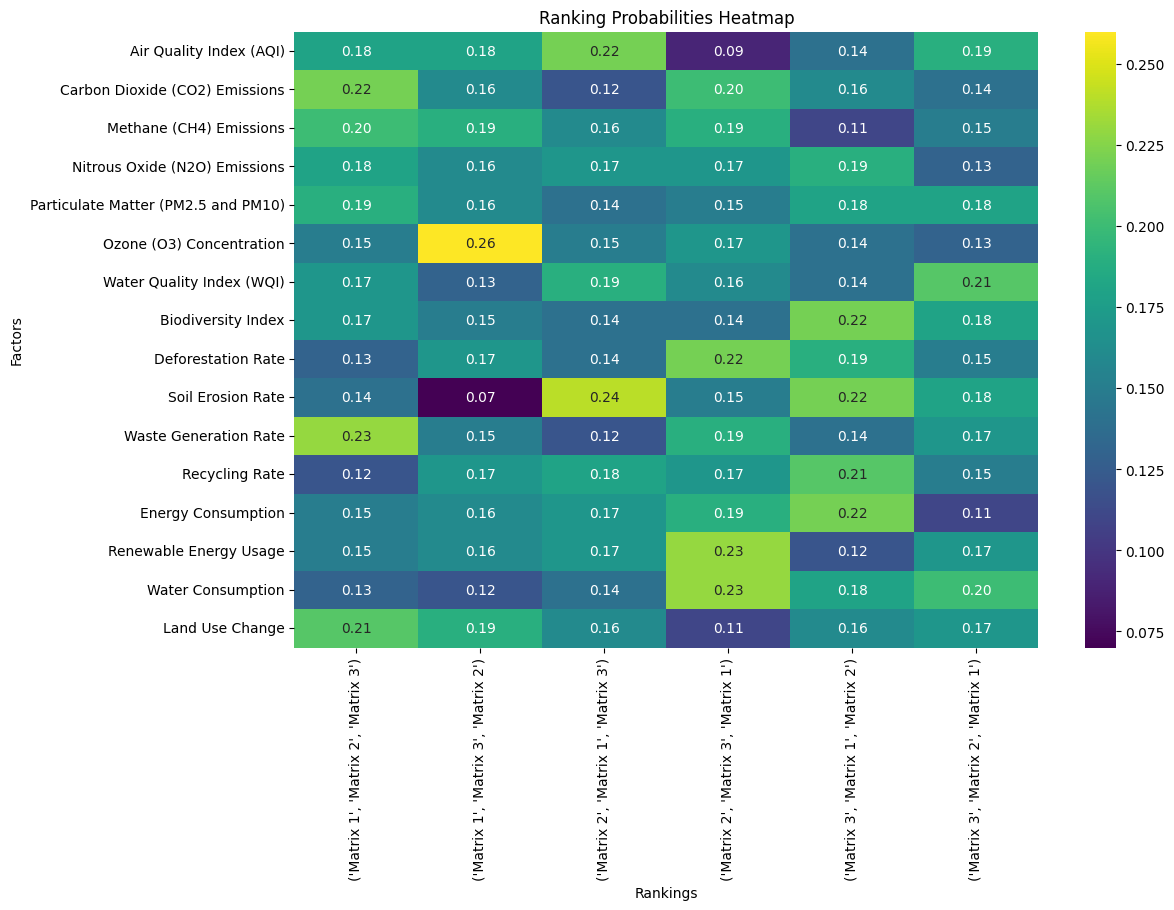

In [ ]:
plot_ranking_probabilities_heatmap(RP_with_probabilities_and_names(matrices, factors=environmental_indicators),environmental_indicators)

In [64]:
import numpy as np

def heaviside_step(x):
    return 1 if x > 0 else 0

def calculate_K4(a1, a2, lambda_percent):
    """
    Calculate the superiority statistic K4,a1.

    Parameters:
    a1 (list or numpy array): Performance values for alternative a1.
    a2 (list or numpy array): Performance values for alternative a2.
    lambda_percent (float): The lambda percentage value.

    Returns:
    float: The superiority statistic K4,a1.
    """
    n = len(a1)
    lambda_factor = 1 + lambda_percent / 100.0
    count = 0

    for i in range(n):
        ratio = a1[i] / a2[i]
        count += heaviside_step(ratio - lambda_factor)

    K4_a1 = count / n
    return K4_a1

# Example usage
a1 = [1.2, 1.5, 1.3, 1.7, 1.4]
a2 = [1.0, 1.1, 1.2, 1.3, 1.1]
lambda_percent = 10

K4_a1 = calculate_K4(a1, a2, lambda_percent)
print(f"K4,a1: {K4_a1}")

K4,a1: 0.8


In [73]:
def calculate_K4_matrices(matrices, lambda_percent):
    """
    Calculate the superiority statistic K4 for each column in the matrices.

    Parameters:
    matrices (list of np.ndarray): List of matrices to compare.
    lambda_percent (float): The lambda percentage value.

    Returns:
    np.ndarray: The superiority statistic K4 for each column.
    """
    num_matrices = len(matrices)
    num_rows, num_cols = matrices[0].shape
    for matrix in matrices:
        if matrix.shape != (num_rows, num_cols):
            raise ValueError("All matrices must have the same dimensions.")

    lambda_factor = 1 + lambda_percent / 100.0
    K4_values = np.zeros(num_cols)

    for col_idx in range(num_cols):
        count = 0
        for row_idx in range(num_rows):
            values = [matrix[row_idx, col_idx] for matrix in matrices]
            for i in range(num_matrices):
                for j in range(i + 1, num_matrices):
                    ratio = values[i] / values[j]
                    count += heaviside_step(ratio - lambda_factor)
        K4_values[col_idx] = count / (num_rows * num_matrices * (num_matrices - 1) / 2)

    return K4_values

# Example usage
lambda_percent = 10
K4_values = calculate_K4_matrices(matrices, lambda_percent)
print(f"K4 values for each column: {K4_values}")

K4 values for each column: [0.35333333 0.35666667 0.35       0.18666667 0.43333333 0.27333333
 0.36666667 0.41       0.38666667 0.29333333 0.29333333 0.46
 0.38       0.3        0.39333333 0.45333333]


In [76]:
def plot_K4_histogram(K4_values, factors, bins=10, color='blue', alpha=0.7):
    """
    Plots a histogram of the K4 values for each factor.

    Parameters:
    K4_values (np.ndarray): The K4 values for each factor.
    factors (List[str]): List of factor names.
    bins (int): Number of bins for the histogram. Default is 10.
    color (str): Color of the histogram bars. Default is 'blue'.
    alpha (float): Transparency level of the bars. Default is 0.7.
    """
    plt.figure(figsize=(12, 6))
    plt.hist(K4_values, bins=bins, color=color, alpha=alpha, edgecolor='black')
    plt.xlabel('K4 Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of K4 Values')
    plt.xticks(ticks=np.arange(len(factors)), labels=factors, rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



AttributeError: Rectangle.set() got an unexpected keyword argument 'labels'

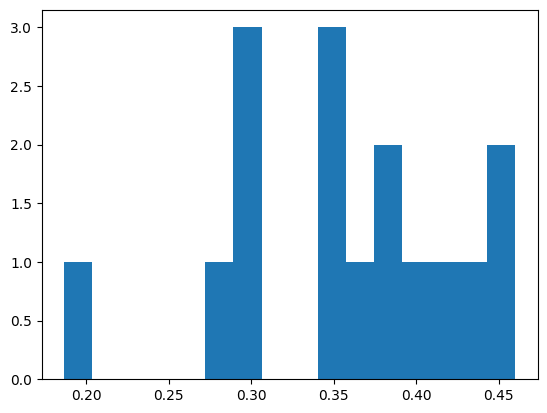

In [80]:
plt.hist(K4_values,labels=environmental_indicators,bins=16)
plt.show()